# SENTIMENT VISUALIZATION OF COVID19 DATASET

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/Thesis/Food for thought /Sentiment Analysis/Covid19/')
covid = pd.read_csv('covid_sentiment.csv')

In [5]:
covid.head(n=3)

,Unnamed: 0,tweet,Subjectivity_tweet,Analysis_sub_tweet,Polarity_tweet,Analysis_pol_tweet,label
0,0,cdc currently reports deaths general discrepan...,0.460000,Personal,-0.060000,Neg,0
1,1,states reported deaths small rise last tuesday...,0.155556,Personal,-0.083333,Neg,0
2,2,politically correct woman almost uses pandemic...,0.075000,Personal,-0.025000,Neg,1


**Tweet Polarity**

In [6]:
tweet_pol_covid = covid[['tweet','Analysis_pol_tweet','label']]

In [7]:
tweet_sub_covid = covid[['tweet','Analysis_sub_tweet','label']]

In [8]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [9]:
#set directory for where to write charts to 
os.chdir('/content/drive/MyDrive/Thesis/Food for thought /Sentiment Analysis/Final_visuals/')

In [10]:
#code for visualization 
def donut_vis(title,data,name): 
  if title == 'Analysis_pol_tweet' or title == 'Analysis_pol_news':
    tit_elem = 'Polarity'
  else: 
    tit_elem = 'Subjectivity'
  title_type = data.groupby(title).agg('count')
  type_labels = title_type.tweet.sort_values().index 
  type_counts = title_type.tweet.sort_values()
  plt.figure(1, figsize=(20,10)) 
  grid = GridSpec(2, 2)
  cmap = plt.get_cmap('Spectral')
  colors = [cmap(i) for i in np.linspace(0, 1, 8)]
  tit = 'Distribution of ' + tit_elem
  plt.subplot(grid[0, 1], aspect=1, title=tit)
  type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
  filename = str(name) + '.png'
  plt.savefig(filename)
  plt.show()

**Tweet polarity**

real class:

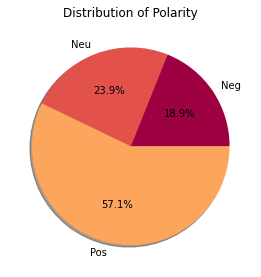

In [11]:
tweet_pol_covid_real = tweet_pol_covid[tweet_pol_covid['label']==0]
donut_vis('Analysis_pol_tweet',tweet_pol_covid_real,'tweet_covid_real_pol')

fake class:

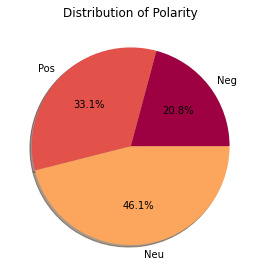

In [12]:
tweet_pol_covid_fake = tweet_pol_covid[tweet_pol_covid['label']==1]
donut_vis('Analysis_pol_tweet',tweet_pol_covid_fake,'tweet_covid_fake_pol')

**Tweet subjectivity**

real class:

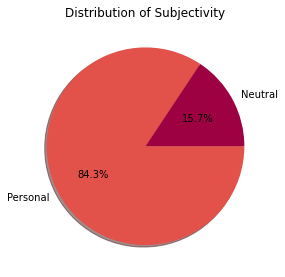

In [13]:
tweet_sub_covid_real = tweet_sub_covid[tweet_sub_covid['label']==0]
donut_vis('Analysis_sub_tweet',tweet_sub_covid_real,'tweet_covid_real_sub')

fake class:

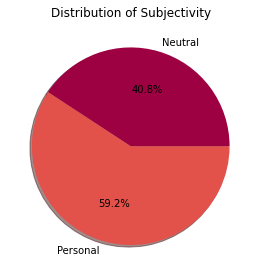

In [14]:
tweet_sub_covid_fake = tweet_sub_covid[tweet_sub_covid['label']==1]
donut_vis('Analysis_sub_tweet',tweet_sub_covid_fake,'tweet_covid_fake_sub')